<a href="https://colab.research.google.com/github/weymouth/NumericalPython/blob/main/03NumpyAndPlotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Python and Plotting

We have established the main features of Python, but up to this point we have only created simple functions and applied them to create lists of numbers. We need to extend the base-language of Python for more advanced numerical work because:
 - There are no built-in data structures for arrays, matrices, and tables (unlike, say, `Matlab` or `Julia`).
 - Using lists of `float` numbers is generally very slow and lacks useful built-in features like matrix multiplication.
 - There is no built-in method to visualize data in plots.

This notebook will introduce the `NumPy` and `PyPlot` libraries to address these issues.

# NumPy

The numerical python, or [NumPy](https://numpy.org/), library enables fast and simple numerical methods in Python. To starting using this library (or any other) we need to use a new python keyword `import`:

In [1]:
import numpy as np # importing numpy

np.set_printoptions(precision=3)   # This sets numpy printing precision 
np.set_printoptions(suppress=True) # Don't use scientific notation by default

This gives us access to all the methods and functions in `NumPy` using the short name `np`. 

In the second and third line I've used the method `set_printoptions` to keep the notebook output pretty. Note that the format is `np` and then `.` and then the function name - just like when we used built-in methods for strings and lists in the previous notebooks. 

There are [far too many](https://numpy.org/doc/stable/reference/routines.html) new methods available to go through in this introduction, but most can be grouped into a few basic categories

| Category       | Sub module   | Description                                                 |
|----------------|--------------|-------------------------------------------------------------|
| math           | numpy        | Scientific operations like $\sqrt{a},\log(a),\sin(a)$, etc |
| arrays         | numpy        | Array and matrix creation, and array operations like multiplication |
| linear algebra | numpy.linalg | Matrix decomposition and solving linear systems |
| fft            | numpy.fft    | Discrete Fourier Transform (of many types) and their inverse |
| random sampling| numpy.random | Sample from different random variable distributions |

<span style="display:none"></span>

Just as an example let see what is in the `numpy.random` submodule.

In [2]:
print("it contains methods such as...",dir(np.random)[30:])

it contains methods such as... ['bytes', 'chisquare', 'choice', 'default_rng', 'dirichlet', 'exponential', 'f', 'gamma', 'geometric', 'get_state', 'gumbel', 'hypergeometric', 'laplace', 'logistic', 'lognormal', 'logseries', 'mtrand', 'multinomial', 'multivariate_normal', 'negative_binomial', 'noncentral_chisquare', 'noncentral_f', 'normal', 'pareto', 'permutation', 'poisson', 'power', 'rand', 'randint', 'randn', 'random', 'random_integers', 'random_sample', 'ranf', 'rayleigh', 'sample', 'seed', 'set_state', 'shuffle', 'standard_cauchy', 'standard_exponential', 'standard_gamma', 'standard_normal', 'standard_t', 'test', 'triangular', 'uniform', 'vonmises', 'wald', 'weibull', 'zipf']


Let's get help on one of those. Notice we use the dot notation twice to access a submodule method.

In [3]:
?np.random.randint

Docstring:
randint(low, high=None, size=None, dtype=int)

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the ``integers`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-like, must contain integer values
size : int or tuple of ints, optional
    Output shape.  If the given shape is, 

All NumPy functions are well documented like this; with all the argument explained and useful examples. Using this function we can generate a sample of what might happen if we, say, roll a 20 sided-dice 4 times.

In [4]:
samples = np.random.randint(1,21,size=4)
samples

array([ 9,  9,  7, 20])

Every time you run this code, the result will be different. Try it!

## Arrays and matrices

Note that `samples` is a new data type called `array`. This is the building block for everything in NumPy. The easiest way to make arrays from scratch is to pass a list to `np.array`. Arrays can also have two dimensions, defining _a matrix_, or more. These can be created by passing a list of lists to `np.array`.

In [5]:
r_array = np.array(range(4))
r_matrix = np.array([[1,2],[3,4],[5,6]])
print(r_array)
print('')
print(r_matrix)

[0 1 2 3]

[[1 2]
 [3 4]
 [5 6]]


Looping and slicing works on arrays just like it did on lists. 

In [6]:
for x in r_array:
    print(x)
print('')
print(r_array[-2:])

0
1
2
3

[2 3]


It also works on matrices (and higher dimensional arrays), but there are more options since there are more indices.

In [7]:
for row in r_matrix: # row by row
    print(row)
    for element in row: # element by element
        print(element)
print('')
print(r_matrix[0,0]) # first element
print(r_matrix[0])   # first row
print(r_matrix[:,0]) # first column

[1 2]
1
2
[3 4]
3
4
[5 6]
5
6

1
[1 2]
[1 3 5]


There are also a few handy built-in functions to create arrays and matrices. See if you can guess what these functions will create before running the code block below.

In [8]:
print(np.linspace(0,1,6))
print('')
print(np.ones([3,2]))
print('')
print(np.eye(4))
print('')
print(np.diag([1,2,3]))

[0.  0.2 0.4 0.6 0.8 1. ]

[[1. 1.]
 [1. 1.]
 [1. 1.]]

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

[[1 0 0]
 [0 2 0]
 [0 0 3]]


The `numpy.linspace` function is especially useful as it makes an array equally spaced floats between the values you specify.

Get some practice with this by defining your own matrix and slicing it.

In [29]:
#1. Define a 3x3 diagonal matrix called `my_matrix` with 2 along the diagonal in two different ways.
# my_matrix = np.eye(3) + np.eye(3)
my_matrix = np.diag([2,2,2])

#2. Slice this matrix to get the array [0 0 2] in two different ways.
# sliced = my_matrix[2]
sliced = my_matrix[-1]
print(sliced)

[0 0 2]


## Array operations and broadcasting

There are a number of built-in NumPy operations that only make sense to apply to arrays vectors and matrices. Things like the transpose, matrix multiplication, and vector products. 

In [30]:
a = np.array([1,2,3])
b = np.array([4,5,6])
print(r_matrix.T)      # transpose
print(r_matrix.T @ a)  # matrix multiplication
print(np.inner(a,b))   # inner product
print(np.cross(a,b))   # cross product

[[1 3 5]
 [2 4 6]]
[22 28]
32
[-3  6 -3]


These are certainly useful in many situations. However, the _really_ nice thing about NumPy arrays is that they automatically and efficiently apply simple operations to each element of the array. Contrast this to lists, which required us to use list-comprehensions to get the same results!

In [32]:
list_a,list_b = [1,2,3],[4,5,6] # lists, not arrays

# list operators give unwanted "string-like" result
print(2*list_a+list_b)        

# list-comprehensions give desired result, but add complexity
print([2*a+b for a,b in zip(list_a,list_b)])

# Numpy arrays give desired result automatically!
print(2*a+b)

[1, 2, 3, 1, 2, 3, 4, 5, 6]
[6, 9, 12]
[ 6  9 12]


This is called _operator broadcasting_ (or vectorizing) and is almost always the behavior we want in numerical programming. 

And this isn't limited to simple operations like `*,+`: NumPy has a slew of built-in scientific functions that will broadcast. Guess what these statements will print before running:

In [33]:
print(np.sqrt(9))
print(np.sqrt(r_array))
print(np.log(np.e))
print(np.log(samples))
print(np.sin(np.pi/2))
print(np.sin(r_matrix*np.pi/4))

3.0
[0.    1.    1.414 1.732]
1.0
[2.197 2.197 1.946 2.996]
1.0
[[ 0.707  1.   ]
 [ 0.707  0.   ]
 [-0.707 -1.   ]]


Notice that NumPy defines some important constants like $e,\pi$ that we can use as well. 

Get some more practice by completing the exercises below. 

In [13]:
#3. Create an array `c` which is my_matrix times the array `a`.

#4. Look up the help for np.linalg.solve and use it to solve the system `my_matrix * x = c`

#5. Use assert to make sure `c` is `2a` and `x` is `a`.


## Array Functions

Not surprisingly, you can write functions for arrays as well, building on any of the original variable operators or NumPy operators. As a first trivial example, let's copy-paste two of our old functions from previous notebooks:

In [14]:
def is_odd(n):
    return n%2==1
def double_then_add(a,b):
    return 2*a+b

print(is_odd(a))
print(double_then_add(a,b))

[ True False  True]
[ 6  9 12]


Notice that operator broadcasting has applied automatically. _We didn't have to change anything!_

As a second example let's create a few functions that wouldn't make sense on individual numbers. Let's rotate a point $p$ in 2D space by an angle $q$ around the origin.

In [15]:
def rotation_matrix(q):
    return np.array([[np.cos(q),-np.sin(q)],
                     [np.sin(q), np.cos(q)]])

def rotate_point(a,q):
    return rotation_matrix(q) @ a

a = np.array([1,1])
for q in np.linspace(0,np.pi,9):
    print("q={:.3g} rad, new p={}".format(q,rotate_point(a,q)))

q=0 rad, new p=[1. 1.]
q=0.393 rad, new p=[0.541 1.307]
q=0.785 rad, new p=[0.    1.414]
q=1.18 rad, new p=[-0.541  1.307]
q=1.57 rad, new p=[-1.  1.]
q=1.96 rad, new p=[-1.307  0.541]
q=2.36 rad, new p=[-1.414  0.   ]
q=2.75 rad, new p=[-1.307 -0.541]
q=3.14 rad, new p=[-1. -1.]


The new `rotate_point` function seems to have worked but it is a little hard to tell... 

# PyPlot

Even for the previous simple example, it would be much easier to check the results if we could plot them. [Matplotlib](https://matplotlib.org/) is the most developed plotting library in python. `Matplotlib.PyPlot` are a collection of functions to make plot copied after the popular Matplot interface.

In [16]:
from matplotlib import pyplot as plt   # import plotting library

Note this `from-import` syntax lets you pick specific submodules or even specific functions to import. This can help with code readability. 

As a first example, let's just plot $\sqrt{x}$ from $x=0...1$

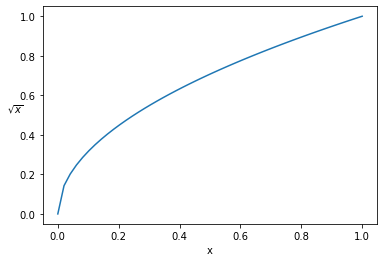

In [17]:
x = np.linspace(0,1)    # array of x values
plt.plot(x,np.sqrt(x))  # plot x vs it's sqrt
plt.xlabel('x')         # label x-axis
plt.ylabel('$\sqrt{x}$',rotation=0) # label y-axis (don't rotate it)
plt.show()              # show the plot

This example shows that you can control pretty much everything in PyPlot, the trick is to just build the figure up one element at a time. 

Lets use PyPlot to test the `rotate_point` function above. We'll exactly the same loop as before, but instead of printing, we will add each rotated point to a scatter plot.

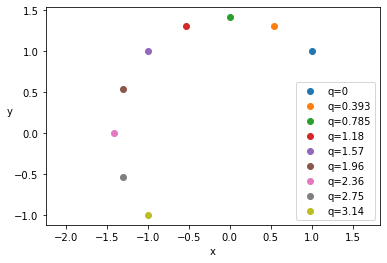

In [18]:
for q in np.linspace(0,np.pi,9):
    x,y = rotate_point(a,q)
    plt.scatter(x,y,label='q={:.3g}'.format(q)) # plot point and assign label
plt.legend()               # show legend
plt.xlabel('x')            # label x-axis
plt.ylabel('y',rotation=0) # label y-axis (don't rotate it)
plt.axis('equal')          # scale the x,y axis equally 
plt.show()                 # show the plot

The points form a half-circle starting from our original point $a=[1,1]$, visually confirming that the `rotate_point` function is working. 

Let's develop a function to create a polar plot of a given function $r(q)$ as a more advanced example.

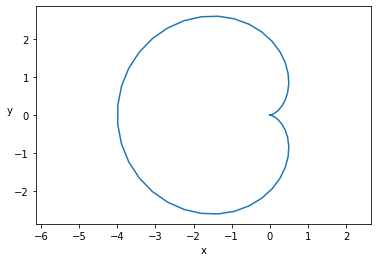

In [19]:
def polar_plot(func,q=np.linspace(0,2*np.pi)):
    r = func(q)                # evaluate the function on q array
    plt.plot(r*np.cos(q),r*np.sin(q)) # compute and plot x,y arrays
    plt.xlabel('x')            # label x-axis
    plt.ylabel('y',rotation=0) # label y-axis (don't rotate it)
    plt.axis('equal')          # scale the x,y axis equally 
    plt.show()                 # show the plot

def cardiod(q): return 2*(1-np.cos(q))
polar_plot(cardiod)

Notice the function `polar_plot` doesn't `return` anything - it just `show`s a plot. The function `polar_plot` is also interesting because its first argument is a *function*, not a number or an array. This is common enough in Python that there is a [lambda](https://realpython.com/python-lambda/) syntax to create functions _in-place_ instead of giving the function a name and then using it.

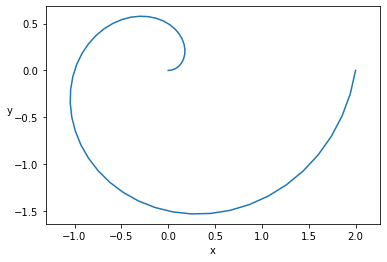

In [20]:
polar_plot(lambda q: q/np.pi) # anonymous function to make a spiral

The `lambda` syntax is very handy when doing more advanced analysis like function optimization, root-finding, integration, etc. Try making a more interesting polar plot, like $2+\sin(10q)$ or any other function you like.


# Failure Modeling Example

Let's finish with an engineering simulation. Let's model the potential failure of a fuel oil pump using a simplistic model. 

First we'll model the pressure upstream of the pump as a random walk: at each time step the pressure can go up, down or stay constant with equal probability. We could do this one random step at a time, but it is faster to generate all the steps at once, and then add them together.

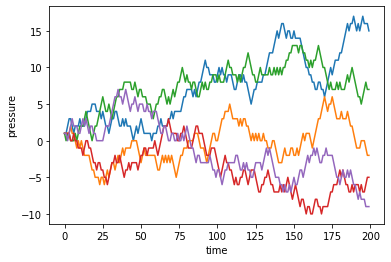

In [21]:
def pressure_walk(n_steps):
    pressure_steps = np.random.randint(-1,2,size=n_steps)
    return np.cumsum(pressure_steps) # cumulative summation of the steps

for i in range(5):
    plt.plot(pressure_walk(200))
plt.xlabel('time'); plt.ylabel('pressure')
plt.show()

Notice the cumulative summation function to get the signal from the steps. The plot shows 5 random pressure histories and every time you run the block above the histories will change.

Now let's think about the FO pump. A pump only has a finite range of operation - if the pressure is too low, the pump will immediately stop working. So lets write a function to check if the pump fails, given a pressure signal. 

In [22]:
def pump_failure(pressure,lower=-15):
    for i,p in enumerate(pressure):
        if p<=lower: return i
    return len(pressure)

pressure_test = np.zeros(10) # zero array for testing
i = np.random.randint(1,11)  # pick a failure time
pressure_test[i:] = -20      # replace test values after this time 
print(pressure_test)
print("Failure time = {}".format(pump_failure(pressure_test)))
assert(i==pump_failure(pressure_test))
print("Test passed!")

[  0.   0.   0.   0.   0.   0. -20. -20. -20. -20.]
Failure time = 6
Test passed!


The `enumerate` function iterates through the index and values in a list or array. This lets us test if the pressure limit has been crossed and return the index when that happens.

The code below the function is a test to see if the function is working properly. [Writing little tests like this lets you catch errors before integrating functions together!](https://docs.python-guide.org/writing/tests/)

Finally, we can use these two function to get a feeling for how quickly our pump is likely to fail. Let's run our code a few thousand times and plot the results as a histogram. 

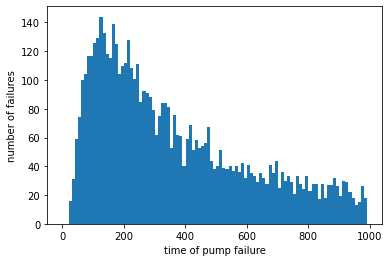

In [23]:
n_runs = 10000
n_steps = 1000
failure_data = [pump_failure(pressure_walk(n_steps)) for i in range(n_runs)]
plt.hist(failure_data,bins=range(1,n_steps,10))
plt.xlabel('time of pump failure'); plt.ylabel('number of failures')
plt.show();

In [24]:
np.count_nonzero(np.array(failure_data)==n_steps)

4411

We see that most failures happen between 100 and 200 time steps, but there is a "long tail" of pumps that last much much longer. 

## Additional exercises

1. Our random walk function isn't very realistic. Find a function in the `numpy.random` submodule to generate steps from a Gaussian distribution instead. How does this change the signals and the failure results?
1. A pump can also fail if it is exposed to excessively high pressure for too long and becomes damaged. Write a function to return the accumulated time the pump spends above a threshold value.